# Experiment

In [12]:
import pandas as pd
import numpy as np
from pprint import pprint
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import time
from _operator import itemgetter
from math import sqrt
import random 
import time

In [66]:
df1=pd.read_csv("20170101_sknn.csv")

In [67]:
df=df1.drop("Unnamed: 0",1)

# Choose Variables

In [68]:
articles=df["id"].unique()
d={}
for i in range(len(articles)):
    article=articles[i]
    d[article]=i
df["articleId"]=df["id"].map(d)
df.columns

Index(['profile', 'category1', 'canonicalUrl', 'referrerHostClass',
       'sessionStop', 'userId', 'publishtime', 'sessionStart', 'referrerUrl',
       'keywords', 'id', 'eventId', 'city', 'title', 'url', 'country',
       'region', 'author', 'referrerSearchEngine', 'deviceType', 'time', 'os',
       'activeTime', 'sessionNo', 'activeTotalTime', 'category_num',
       'articleId'],
      dtype='object')

In [69]:
#data=df[["sessionNo","category_num","time"]].rename(columns={"sessionNo":"session_key","category_num": "item_key", "time":"time_key"})
data=df[["sessionNo","articleId","time","city","region","deviceType"]].rename(columns={"sessionNo":"session_key","articleId": "item_key", "time":"time_key"})
data.head()

,session_key,item_key,time_key,city,region,deviceType
0,1,0,1483305738,oslo,oslo,Desktop
1,2,1,1483260265,brumunddal,hedmark,Desktop
2,3,2,1483271454,brumunddal,hedmark,Desktop
3,4,0,1483302497,brumunddal,hedmark,Desktop
4,6,0,1483309277,trondheim,sor-trondelag,Tablet


## DeviceType

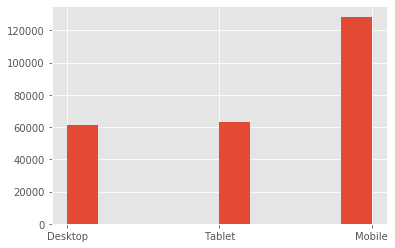

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
fig=plt.hist(data["deviceType"])

In [221]:
t=pd.get_dummies(data["deviceType"])
tmp=pd.read_csv("day_one_region.csv")
new_data=tmp.join(t).drop("Unnamed: 0",1)

In [223]:
new_data.to_csv("day_one_region_device.csv")

## Regions

In [76]:
from geopy.geocoders import Nominatim
from tqdm import tqdm
geolocator = Nominatim(user_agent="specify_your_app_name_here")
d={}
for i in tqdm(range(len(k))):
    location = geolocator.geocode(i)
    if not location:
        d[k[i]]=(0,0)
    else:
        d[k[i]]=(location.latitude, location.longitude)



  0%|          | 0/453 [00:00<?, ?it/s]

  0%|          | 1/453 [00:00<03:19,  2.27it/s]

  0%|          | 2/453 [00:01<04:40,  1.61it/s]

  1%|          | 3/453 [00:02<04:53,  1.53it/s]

  1%|          | 4/453 [00:03<05:37,  1.33it/s]

  1%|          | 5/453 [00:03<05:23,  1.39it/s]

  1%|▏         | 6/453 [00:04<05:35,  1.33it/s]

  2%|▏         | 7/453 [00:05<05:18,  1.40it/s]

  2%|▏         | 8/453 [00:05<04:58,  1.49it/s]

  2%|▏         | 9/453 [00:06<05:12,  1.42it/s]

  2%|▏         | 10/453 [00:07<05:17,  1.40it/s]

  2%|▏         | 11/453 [00:07<04:51,  1.52it/s]

  3%|▎         | 12/453 [00:08<04:32,  1.62it/s]

  3%|▎         | 13/453 [00:08<04:21,  1.68it/s]

  3%|▎         | 14/453 [00:09<04:10,  1.76it/s]

  3%|▎         | 15/453 [00:09<03:58,  1.84it/s]

  4%|▎         | 16/453 [00:10<04:00,  1.82it/s]

  4%|▍         | 17/453 [00:11<03:51,  1.88it/s]

  4%|▍         | 18/453 [00:11<03:54,  1.85it/s]

  4%|▍         | 19/453 [00:12<03:47,  1.91it/s]

  4%|▍         |

In [85]:
tmp=data["region"].map(d)
tmp.apply(lambda x:list(x).split())

AttributeError: 'list' object has no attribute 'split'

In [97]:
data["lat"]=tmp.apply(lambda x:x[0])
data["long"]=tmp.apply(lambda x:x[1])

In [99]:
data.to_csv("day_one_region.csv")

In [100]:
data

,session_key,item_key,time_key,city,region,lat,long
0,1,0,1483305738,oslo,oslo,59.913868,10.752245
1,2,1,1483260265,brumunddal,hedmark,22.351115,78.667743
2,3,2,1483271454,brumunddal,hedmark,22.351115,78.667743
3,4,0,1483302497,brumunddal,hedmark,22.351115,78.667743
4,6,0,1483309277,trondheim,sor-trondelag,34.563019,133.685164
...,...,...,...,...,...,...,...
252985,293523,11,1483307427,steinkjer,nord-trondelag,44.315857,2.506570
252986,293524,8,1483281241,oslo,oslo,59.913868,10.752245
252987,293524,45,1483281328,oslo,oslo,59.913868,10.752245
252988,293525,23,1483290880,floro,sogn og fjordane,48.447410,1.399882


In [14]:
day_one=pd.read_csv("day_one_region.csv")
day_one

,Unnamed: 0,session_key,item_key,time_key,city,region,lat,long
0,0,1,0,1483305738,oslo,oslo,59.913868,10.752245
1,1,2,1,1483260265,brumunddal,hedmark,22.351115,78.667743
2,2,3,2,1483271454,brumunddal,hedmark,22.351115,78.667743
3,3,4,0,1483302497,brumunddal,hedmark,22.351115,78.667743
4,4,6,0,1483309277,trondheim,sor-trondelag,34.563019,133.685164
...,...,...,...,...,...,...,...,...
252985,252985,293523,11,1483307427,steinkjer,nord-trondelag,44.315857,2.506570
252986,252986,293524,8,1483281241,oslo,oslo,59.913868,10.752245
252987,252987,293524,45,1483281328,oslo,oslo,59.913868,10.752245
252988,252988,293525,23,1483290880,floro,sogn og fjordane,48.447410,1.399882


In [40]:
day_one

,Unnamed: 0,session_key,item_key,time_key,city,region,lat,long
0,0,1,0,1483305738,oslo,oslo,59.913868,10.752245
1,1,2,1,1483260265,brumunddal,hedmark,22.351115,78.667743
2,2,3,2,1483271454,brumunddal,hedmark,22.351115,78.667743
3,3,4,0,1483302497,brumunddal,hedmark,22.351115,78.667743
4,4,6,0,1483309277,trondheim,sor-trondelag,34.563019,133.685164
...,...,...,...,...,...,...,...,...
252985,252985,293523,11,1483307427,steinkjer,nord-trondelag,44.315857,2.506570
252986,252986,293524,8,1483281241,oslo,oslo,59.913868,10.752245
252987,252987,293524,45,1483281328,oslo,oslo,59.913868,10.752245
252988,252988,293525,23,1483290880,floro,sogn og fjordane,48.447410,1.399882


In [41]:
day_one["session_key"].unique()

array([     1,      2,      3, ..., 293524, 293525, 293528])